### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

- Independant variables can be congruent words and Incongruent words.

- Dependant variables can be the respone time.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

**ANSWER:** 

- μ0 = population mean of incongruent values.
- μ = population mean of congruent values. 

**1-** Null hypothesis (Ho) : The Incongruent words will not increase the respones time of the participant (μ = μ0). 

**2-** Alternative Hypothesis (H1) : The Incongruent words will defintely increase the respones time of the participant (μ != μ0).


**Tests to be performed:** Dependant Two sample t-test, to determine whether the means of two groups differ.

The reason why I choose this test is because, The experiment is applied on same participants more than once to observe the mean difference between the two groups.

In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t

In [2]:
#Reading the csv file
stroop_data = pd.read_csv('stroopdata.csv')

In [3]:
#exploring the data
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [6]:
stroop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [7]:
# Perform the analysis here
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- The congruent sample has a mean of which is 14.051 seconds and a standard deviation is 3.559 seconds. The maximum is 22.32 while the minimum is 8.63
- The incongruent sample has a mean which is 22.016 seconds and a standard deviation is 4.797 seconds.The maximum is 35.25 while the minimum is 15.68

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0,0.5,'Frequency')

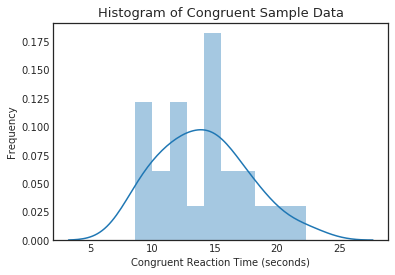

In [15]:
sns.set_style('white')
g = sns.distplot(stroop_data['Congruent'],bins=10)
g.axes.set_title('Histogram of Congruent Sample Data', fontsize=13)
plt.xlabel("Congruent Reaction Time (seconds)")
plt.ylabel("Frequency")

- “Congruent” distrbution tend to be normal. The majority of participants completed the test approximately in 15 seconds.  

Text(0,0.5,'Frequency')

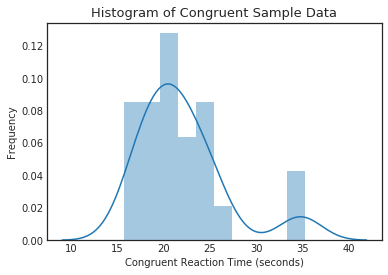

In [16]:
sns.set_style('white')
g = sns.distplot(stroop_data['Incongruent'],bins=10)
g.axes.set_title('Histogram of Congruent Sample Data', fontsize=13)
plt.xlabel("Congruent Reaction Time (seconds)")
plt.ylabel("Frequency")

- As we can see here, The “Incongruent” has a positive skewed distrbution with some outliers. most participants completed the test around 20 seconds while the outlier alomist in 35 seconds.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

#### Answer:

- The Test is two tailed t- test so find the critical value of t at 95% confidance level.
- Sample Size(n) = 24
- Degree of freedom(df) = n - 1 = 23


In [24]:
#t-critical value for a 95% confidence level and 23 d.f.

print("t-critical value for two tailed test is: ",t.ppf(.95, 23))

t-critical value for two tailed test is:  1.71387152775


For a confidence level of 95% and 23 degrees of freedom the t-critical value is 1.7139

In [20]:
#find the diffenence of each data
stroop_data['difference'] = stroop_data['Congruent'] - stroop_data['Incongruent']
stroop_data.head()

,Congruent,Incongruent,difference
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134


In [26]:
#std and mean of the differenced dataset

print("Standard Deviation of the diffenenced dataset: ", stroop_data['difference'].std())
print("Mean of Difference: ", stroop_data['difference'].mean())

Standard Deviation of the diffenenced dataset:  4.86482691036
Mean of Difference:  -7.96479166667


In [28]:
#  calculate the t-statistic for the difference
import scipy.stats as stats
stats.ttest_rel(a = stroop_data['Congruent'], b = stroop_data['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

-  The t-test was applied on a sample of 24 participants to determine whether there was a statistically significant mean difference between the reaction time between the congruent and incongruent condition.
- Since the t-statistic (8.02) is greater than the critical value (1.7139),So I can reject the Null Hypothesis as the Alternative Hypothesis appears to be true.Therfore, the results match up with our expectations that there is a statistically significant difference in the response time to perform the incongruent test compared to the congruent test.


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--